# Detect Outliers in your general ledger

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Donec rhoncus convallis laoreet. In nec varius est, consequat venenatis nulla. Mauris non elit leo. Quisque lorem est, condimentum at luctus ac, tempus eget tortor. Quisque mollis justo purus, in sollicitudin nisl mollis at. Proin justo sapien, viverra a enim nec, interdum lacinia est. Donec cursus elementum ligula quis consectetur. 

[flask text](https://blog.miguelgrinberg.com/post/the-flask-mega-tutorial-part-i-hello-world)



<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/micro/examples/hello_world/train/train_hello_world_model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/thierrytheg/accounting_outliers"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
#https://developer.xero.com/documentation/api/journals
#https://qbar.intuit.com/resources.html
#Crystal Reports

#Sage: columns lJEntId, lAcctId and dAmount from table #tJEntAct


## Configure Defaults

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
#clone github repo
!git clone https://github.com/thierrytheg/accounting_outliers.git

#delete temp file from upload file
!rm -r /content/accounting_outliers/uploads/test.txt

Cloning into 'accounting_outliers'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 52 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [2]:
!pip install flask-ngrok
!pip install pandas
!pip install openpyxl
!pip install matplotlib.pyplot
!pip install numpy
!pip install ipywidgets

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [ ]:
from flask import Flask
from flask import render_template, request, redirect, url_for, abort, send_from_directory

from werkzeug.utils import secure_filename

import os

app = Flask(__name__,template_folder='/content/accounting_outliers/templates/')

app.config['UPLOAD_EXTENSIONS'] = ['.xls', '.xlsx', '.csv']

app.config['UPLOAD_PATH'] = r'/content/accounting_outliers/uploads/'

from flask_ngrok import run_with_ngrok
run_with_ngrok(app)

@app.route("/")
def home():
    return render_template('home.html')

@app.errorhandler(413)
def too_large(e):
    return "Format Not Supported", 413


@app.route('/', methods=['POST'])
def upload_files():
    uploaded_file = request.files['file']
    filename = secure_filename(uploaded_file.filename)
    if filename != '':
        file_ext = os.path.splitext(filename)[1]
        if file_ext not in app.config['UPLOAD_EXTENSIONS'] :
            return "This format is not supported", 400
        uploaded_file.save(os.path.join(app.config['UPLOAD_PATH'], filename))
    return "File Successfully Uploaded. You can now close this tab.", 204

@app.route('/<filename>')
def uploads(filename):
    return send_from_directory(app.config['UPLOAD_PATH'], filename)

if __name__ == '__main__':
  app.run()



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://23cb15670420.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [11/Feb/2021 19:31:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Feb/2021 19:31:16] "GET /favicon.ico HTTP/1.1" 404 -


In [190]:
import pandas as pd

import os
os.chdir(r'/content/accounting_outliers/uploads/')

try:

  if len([name for name in os.listdir('.') if (os.path.isfile(name) and ((name.split('.')[1]).startswith('xls') or (name.split('.')[1]).startswith('csv')))])==0:
    print("You have no files in the uplodad folder.")

  elif len([name for name in os.listdir('.') if (os.path.isfile(name) and ((name.split('.')[1]).startswith('xls') or (name.split('.')[1]).startswith('csv')))])>1:
    print("You have too many files in the uplodad folder. Please remove %s files in order to keep 1." %len([name for name in os.listdir('.') if (os.path.isfile(name) and ((name.split('.')[1]).startswith('xls') or (name.split('.')[1]).startswith('csv'))-1)])) 

  elif len([name for name in os.listdir('.') if (os.path.isfile(name) and ((name.split('.')[1]).startswith('xls') or (name.split('.')[1]).startswith('csv')))])==1:
    for file in os.listdir(os.getcwd()):
      if os.path.isfile(file) and (file.split('.')[1]).startswith('xls'):

        try:
          if file.split('.')[1]=='csv':
            df=pd.read_csv(file)

          elif (file.split('.')[1]).startswith('xls'):
            df=pd.read_excel(file)
            print("Your dataset contains %s columns and %s rows for a total of %s elements." %(df.shape[1],df.shape[0],df.size))

          else:
            print("The file is not an excel or a csv")


        except Exception as e:
          print(files,e)

except Exception as e:
  print(e)

Your dataset contains 4 columns and 3033 rows for a total of 12132 elements.


In [191]:
#Detect column with Account Listing

for n in range(len(df.select_dtypes(include='int').columns)):
  if ('acc' or 'account') in (df.select_dtypes(include='int').columns[n]).lower():
    df['Account']=df[df.select_dtypes(include='int').columns[n]]
    print("The 'Account' column was successfully identified")
    

#Detect column with dollar values
for n in range(len(df.select_dtypes(include='float64').columns)):
  if ('am' or 'amount') in (df.select_dtypes(include='float64').columns[n]).lower():
    df['Amount']=df[df.select_dtypes(include='float64').columns[n]]
    print("The 'Amount' column was successfully identified")
    

new_columns=['Account','Amount']
for column in new_columns:
  if column in df.columns:
    pass
  else:
    print("Unable to detect your %s column. Please rename the appropriate column '%s' and re-upload the file" %(column,column))

The 'Account' column was successfully identified
The 'Amount' column was successfully identified


In [192]:
#Detect time series to use for calculations convert Amount to absolute values
df['Abs_Val']=abs(df[df.select_dtypes(include='float64').columns])



#filter out all rows with values under 1
df=df.loc[df['Abs_Val']>1]

#convert First_Digit column to string and extract first digit
df['First_Digit']=(df['Abs_Val']).apply(str).str[0]

#create series with count for each first digit
bensford_df=df['First_Digit'].value_counts()
bensford_df['Your_Dist_Pct']=round((bensford_df/bensford_df.sum())*100,1)


#create a temporary dataframe to plot Benford Distribution
bensford_list=list(bensford_df['Your_Dist_Pct'])

data={
'First_Digit':[1,2,3,4,5,6,7,8,9],
'Your_Distribution' : bensford_list,
'Bensford_Distribution': [30.1,17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6]
}
df_plot=pd.DataFrame(data=data,columns=['First_Digit','Your_Distribution','Bensford_Distribution'])
df_plot

,First_Digit,Your_Distribution,Bensford_Distribution
0,1,43.2,30.1
1,2,18.5,17.6
2,3,12.3,12.5
3,4,9.9,9.7
4,5,6.6,7.9
5,6,3.8,6.7
6,7,2.7,5.8
7,8,1.8,5.1
8,9,1.3,4.6


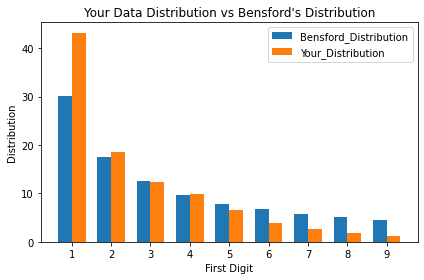

In [193]:
#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

import matplotlib.pyplot as plt
import numpy as np

labels = list(df_plot['First_Digit'])
Bensford_Distribution = list(df_plot['Bensford_Distribution'])
Your_Distribution = list(df_plot['Your_Distribution'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, Bensford_Distribution, width, label='Bensford_Distribution')
rects2 = ax.bar(x + width/2, Your_Distribution, width, label='Your_Distribution')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('First Digit')
ax.set_ylabel('Distribution')

ax.set_title("Your Data Distribution vs Bensford's Distribution")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(''.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
a=fig.savefig(r'/content/accounting_outliers/uploads/benfords_dtr.png')

Explain what the Bensford Distribution does and what the interpretations can be

In [ ]:
#describe method used to detect outliers

In [213]:
#Vizualize your data by account and immediately identify outliers

import altair as alt
import ipywidgets as widgets


q3_sensitivity=0.9
q1_sensitivity=0.1


account_picker = widgets.SelectMultiple(
    options=sorted(df.Account.unique()),
    value=list(df.Account.unique()),
    description='Select Account')

@widgets.interact(account=account_picker)
def render(account):
  selected = df[df.Account.isin(list(account))]
  print("==============")

  outlierq3=(selected[selected.columns].loc[selected[df.select_dtypes(include='float64').columns[0]]>np.quantile(df[df.select_dtypes(include='float64').columns[0]],q3_sensitivity)])
  outlierq1=(selected[selected.columns].loc[selected[df.select_dtypes(include='float64').columns[0]]<np.quantile(df[df.select_dtypes(include='float64').columns[0]],q1_sensitivity)])


  if (len(outlierq1) and len(outlierq3)) == 0:
    print("No outliers were detected for this account")


  else:

    print("Outliers detected for this account: %s" %((outlierq3.shape[0])+outlierq1.shape[0]))    

    print("For the account(s) selected,")
    print("Transactions relating to this account greater than %s or smaller than %s need attention" %("{:,.2f}".format(round(np.quantile(selected['Amount'],q3_sensitivity),0)),"{:,.2f}".format(round(np.quantile(selected['Amount'],q1_sensitivity),0))))
  
  return alt.Chart(selected).mark_boxplot().encode(
      y='Amount').properties(width=300,height=500)
  

interactive(children=(SelectMultiple(description='Select Account', index=(0, 74, 70, 68, 69, 73, 72, 71, 48, 8…